In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
import psutil
import time

# TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
file_path = r'C:\Users\Wilky Martin\Documents\Chaos BPNN\Sorted_Exchange_Rates_CNY_to_IDR.xlsx'
data = pd.read_excel(file_path)
print(data.head(1475))

        NO  Value     Sell      Buy       Date
0     1474      1  2122.75  2101.72 2019-01-02
1     1473      1  2119.45  2098.47 2019-01-03
2     1472      1  2102.76  2081.77 2019-01-04
3     1471      1  2068.98  2048.25 2019-01-07
4     1470      1  2061.49  2041.02 2019-01-08
...    ...    ...      ...      ...        ...
1469     5      1  2240.40  2218.05 2024-12-23
1470     4      1  2224.87  2202.67 2024-12-24
1471     3      1  2231.74  2209.51 2024-12-27
1472     2      1  2237.54  2215.25 2024-12-30
1473     1      1  2225.26  2203.08 2024-12-31

[1474 rows x 5 columns]


In [54]:
df_selected_ = data[['Date', 'Sell']]
# Display the selected data
print(df_selected_.head(2694))

           Date     Sell
0    2019-01-02  2122.75
1    2019-01-03  2119.45
2    2019-01-04  2102.76
3    2019-01-07  2068.98
4    2019-01-08  2061.49
...         ...      ...
1469 2024-12-23  2240.40
1470 2024-12-24  2224.87
1471 2024-12-27  2231.74
1472 2024-12-30  2237.54
1473 2024-12-31  2225.26

[1474 rows x 2 columns]


In [55]:
df_selected_ = df_selected_.copy()

# Normalisasi kolom 'sell'
df_selected_['Sell'] = (df_selected_['Sell'] - df_selected_['Sell'].min()) / (df_selected_['Sell'].max() - df_selected_['Sell'].min())

print(df_selected_.head(1475))

           Date      Sell
0    2019-01-02  0.394741
1    2019-01-03  0.386523
2    2019-01-04  0.344962
3    2019-01-07  0.260845
4    2019-01-08  0.242193
...         ...       ...
1469 2024-12-23  0.687709
1470 2024-12-24  0.649036
1471 2024-12-27  0.666144
1472 2024-12-30  0.680587
1473 2024-12-31  0.650007

[1474 rows x 2 columns]


In [56]:
# --- Membuat Dataset Time-Series ---
window_size = 3
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size]['Sell'].values)
        y.append(data.iloc[i+window_size]['Sell'])
    return np.array(X), np.array(y)

X, y = create_dataset(df_selected_, window_size)

# --- Split Data ---
total = len(X)
train_size = int(0.7 * total)
val_size = int(0.15 * total)

X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# --- Reshape ke CNN-LSTM ---
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))



# --- Cek hasil pembagian ---
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("Contoh X[0]:", X[0])
print("Contoh y[0]:", y[0])
print("Contoh y_test last:", y_test[-1])  # Ini seharusnya sama dengan nilai terakhir Sell
print("Nilai terakhir di Sell:", df_selected_['Sell'].iloc[-1])  # Pembanding



X_train shape: (1029, 3, 1)
y_train shape: (1029,)
X_val shape: (220, 3, 1)
y_val shape: (220,)
X_test shape: (222, 3, 1)
y_test shape: (222,)
Contoh X[0]: [0.39474077 0.38652323 0.3449624 ]
Contoh y[0]: 0.26084466357886354
Contoh y_test last: 0.6500074704915589
Nilai terakhir di Sell: 0.6500074704915589


Epoch 1/100


c:\Users\Wilky Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1283 - val_loss: 0.0016
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 4.5292e-04
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4781e-04 - val_loss: 6.5092e-04
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5290e-04 - val_loss: 4.1535e-04
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 4.1173e-04
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6660e-04 - val_loss: 4.6130e-04
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3101e-04 - val_loss: 4.1525e-04
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6907e-04 - val_loss: 4.1089e-04
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4466e-04 - val_loss: 3.8142e-04
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7209e-04 - val_loss: 3.8804e-04
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6600e-04 - val_loss: 4.5466e-04
Epo

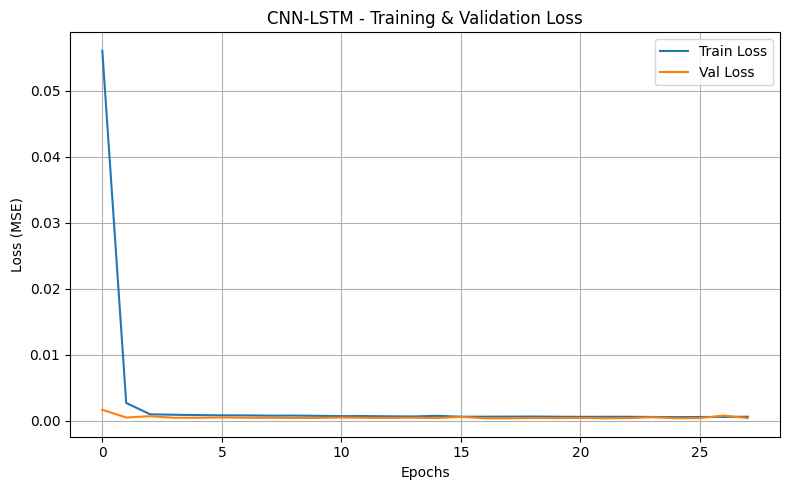

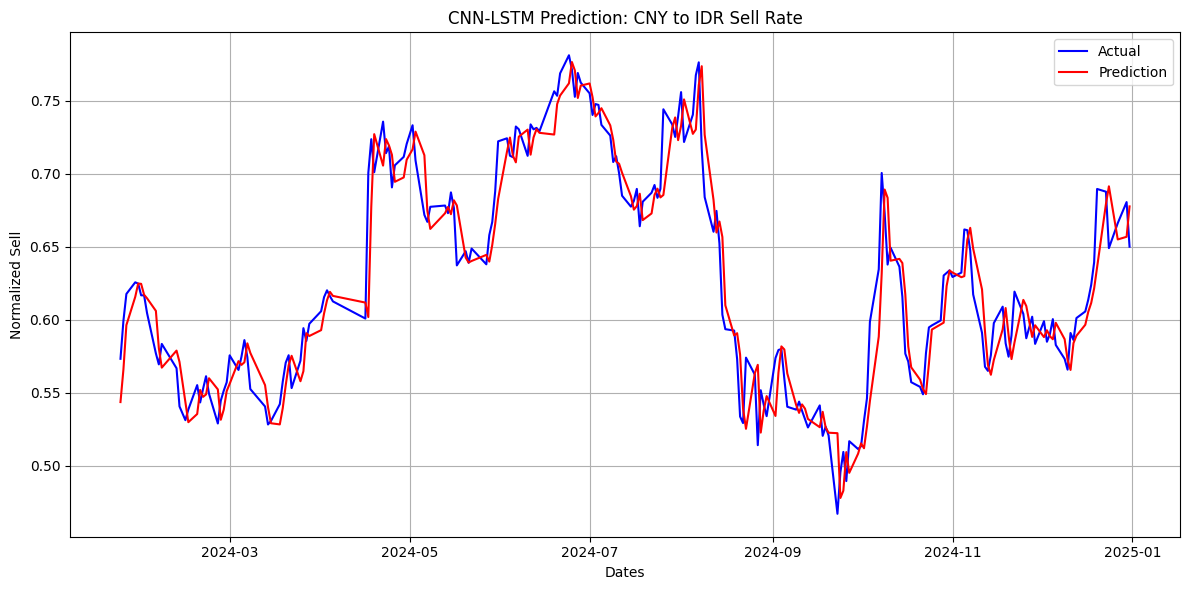

CNN-LSTM Test MSE      : 0.000483
CNN-LSTM Training Time : 3.88 seconds
CNN-LSTM CPU Usage     : 4.2%


In [57]:
# --- Cek CPU ---
def get_cpu_usage():
    return psutil.cpu_percent()

# --- Arsitektur CNN-LSTM ---
start_time = time.process_time()

model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)),
    LSTM(50, activation='tanh'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

end_time = time.process_time()
elapsed_time = end_time - start_time
cpu_usage = get_cpu_usage()

# --- Evaluasi dan Prediksi ---
y_pred = model.predict(X_test).flatten()
mse_test = mean_squared_error(y_test, y_pred)

# --- Prepare Date untuk Plot ---
dates_all = df_selected_['Date'][window_size:].reset_index(drop=True)
date_test = dates_all[train_size + val_size:].reset_index(drop=True)

# --- Visualisasi Loss ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("CNN-LSTM - Training & Validation Loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# --- Visualisasi Prediksi ---
plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label="Actual", color="blue")
plt.plot(date_test, y_pred, label="Prediction", color="red")
plt.xlabel("Dates")
plt.ylabel("Normalized Sell")
plt.title("CNN-LSTM Prediction: CNY to IDR Sell Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Tampilkan Metrik ---
print(f"CNN-LSTM Test MSE      : {mse_test:.6f}")
print(f"CNN-LSTM Training Time : {elapsed_time:.2f} seconds")
print(f"CNN-LSTM CPU Usage     : {cpu_usage}%")
